Link which i have refered to for the implementation

https://towardsdatascience.com/lasso-regression-tutorial-fd68de0aa2a2

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,239.695455
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,264.064286
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

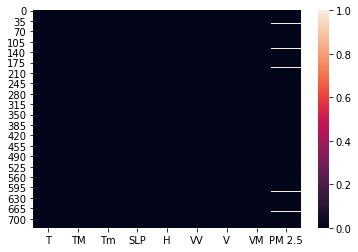

In [4]:
sns.heatmap(df.isnull())

# Dropping the null values

<AxesSubplot:>

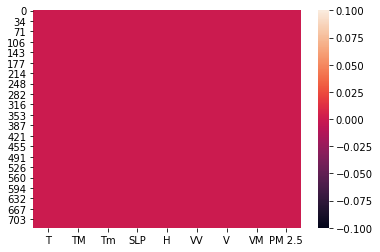

In [6]:
df.dropna(inplace=True)
sns.heatmap(df.isnull())

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [37]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import cross_val_score
import sklearn

In [39]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [86]:
linear = LinearRegression()
print(
    cross_val_score(linear, X, y, scoring='neg_mean_squared_error',
                    cv=5).mean())

-3502.290892407224


Score (R2 score):  0.5423644748230535


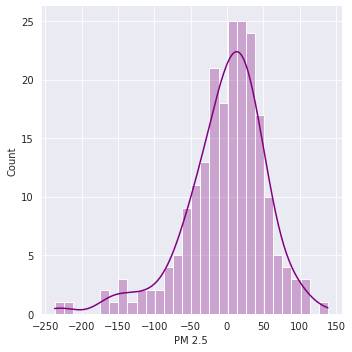

In [72]:
linear.fit(X_train, y_train)
prediction = linear.predict(X_test)
score = linear.score(X_test, y_test)
print('Score (R2 score): ', score)
sns.displot(prediction - y_test, kde=True, color='purple', alpha=0.3, bins=30)

In [73]:
from sklearn.model_selection import GridSearchCV

In [76]:
lasso = Lasso()
ridge = Ridge()

In [88]:
parameters = {
    'alpha':
    [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1, 3, 5, 7, 10, 20, 50, 100, 200]
}

In [94]:
lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)
lasso_regressor.fit(X, y)

/home/akanksh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 420581.11973310786, tolerance: 424.35132711753533
  model = cd_fast.enet_coordinate_descent(
/home/akanksh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118161.035062326, tolerance: 377.9498972321668
  model = cd_fast.enet_coordinate_descent(
/home/akanksh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 386260.6287927086, tolerance: 413.7203936312383
  model = cd_fast.enet_coordinate_descent(
/home/akanksh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordin

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 0.1, 1, 3,
                                   5, 7, 10, 20, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [95]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-3373.6630206603195


In [96]:
ridge_regressor = GridSearchCV(ridge,
                               parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)
ridge_regressor.fit(X, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 0.1, 1, 3,
                                   5, 7, 10, 20, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [97]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
-3350.1005475617267


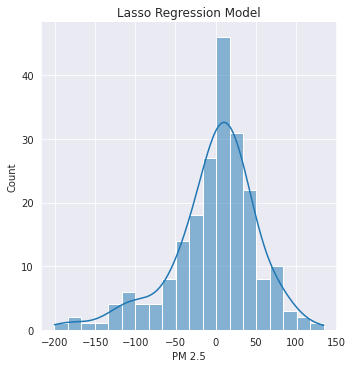

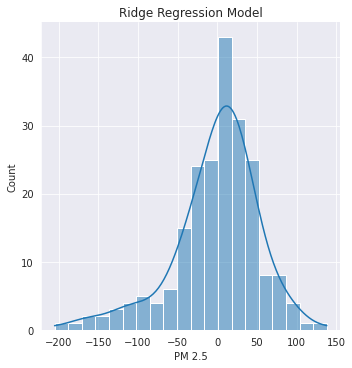

In [103]:
sns.displot(lasso_regressor.predict(X_test)-y_test,kde = True , bins = 20 ).set(title='Lasso Regression Model')
sns.displot(ridge_regressor.predict(X_test)-y_test,kde = True , bins = 20 ).set(title='Ridge Regression Model')

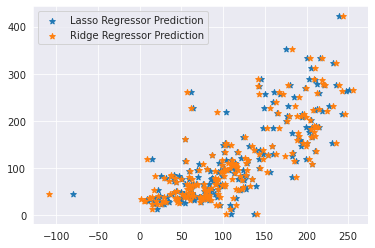

In [122]:
plt.scatter(lasso_regressor.predict(X_test),y_test, marker = '*').set(label='Lasso Regressor Prediction')
plt.scatter(ridge_regressor.predict(X_test),y_test, marker = '*').set(label='Ridge Regressor Prediction')
plt.legend()

In [123]:
import pickle

In [152]:
with open('Pickle Files/ridge_regressor_model.pkl','wb') as f:
    pickle.dump(ridge_regressor,f)

with open('Pickle Files/lasso_regressor_model.pkl','wb') as f:
    pickle.dump(lasso_regressor,f)

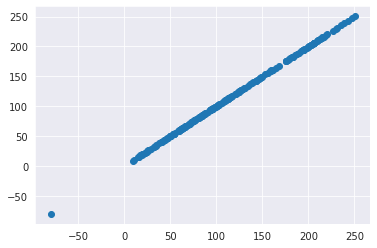

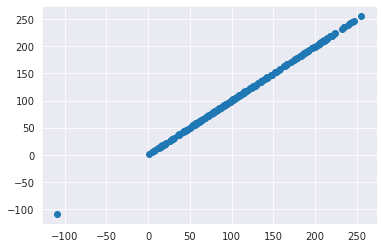

In [156]:
with open('Pickle Files/lasso_regressor_model.pkl','rb') as f:
    model = pickle.load(f)

plt.scatter(lasso_regressor.predict(X_test),model.predict(X_test))
plt.show()
with open('Pickle Files/ridge_regressor_model.pkl','rb') as f:
    model = pickle.load(f)

plt.scatter(ridge_regressor.predict(X_test),model.predict(X_test))
plt.show()